# Introdução ao Projeto: Previsão de Crédito de Clientes

Neste projeto, nosso objetivo é desenvolver um modelo de machine learning para prever a probabilidade de um cliente de cartão de crédito entrar em default (não pagamento) no próximo mês. Utilizando um dataset com informações de 30 mil clientes, incluindo variáveis demográficas, histórico de pagamentos, limites de crédito e saldos de faturas, vamos criar um modelo capaz de identificar padrões que indiquem um risco elevado de inadimplência.

# Contexto do Problema

 A previsão de risco de crédito é uma tarefa crucial para instituições financeiras, pois ajuda a minimizar perdas financeiras e a conceder crédito de forma mais eficiente. Modelos preditivos permitem que essas instituições classifiquem clientes de acordo com o risco de inadimplência, ajustando limites de crédito ou taxas de juros com base no perfil de risco.

Objetivo


O objetivo principal deste projeto é construir um modelo preditivo que possa, de forma eficaz, distinguir entre clientes que irão ou não entrar em default no próximo mês. Para isso, utilizaremos técnicas de análise exploratória de dados, pré-processamento, e algoritmos de machine learning para criar um modelo robusto e preciso. O modelo final será otimizado para evitar overfitting, garantindo assim sua generalização para novos dados.

Resultados Esperados

Ao final deste projeto, espera-se obter:

Um modelo de machine learning treinado que possa ser utilizado para prever inadimplência em novos clientes.
Um processo de avaliação do modelo que nos permita garantir sua eficácia e evitar overfitting.
A implementação do modelo em uma aplicação Streamlit, onde ele poderá ser utilizado para fazer previsões em tempo real.

Fluxo de Trabalho

O projeto será conduzido em várias etapas:

Análise Exploratória de Dados (EDA): Investigação inicial dos dados para entender suas características e identificar padrões relevantes.
Pré-processamento: Limpeza e transformação dos dados para preparar para o treinamento do modelo.
Treinamento do Modelo: Testar diferentes algoritmos de machine learning e escolher o mais adequado.
Otimização: Ajuste fino do modelo para melhorar sua performance, minimizando o overfitting.
Implementação: Deploy do modelo utilizando Streamlit para permitir seu uso em um ambiente de produção.
Agora que temos uma introdução clara, podemos seguir para a análise exploratória dos dados (EDA) e o pré-processamento. Vamos prosseguir com a EDA?

In [3]:
import pandas as pd

# Carregar o dataset
file_path = 'credit_card_clients.csv'
df = pd.read_csv(file_path, header=1)

# Exibir as primeiras linhas do dataset
print(df.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

# analise explorativa

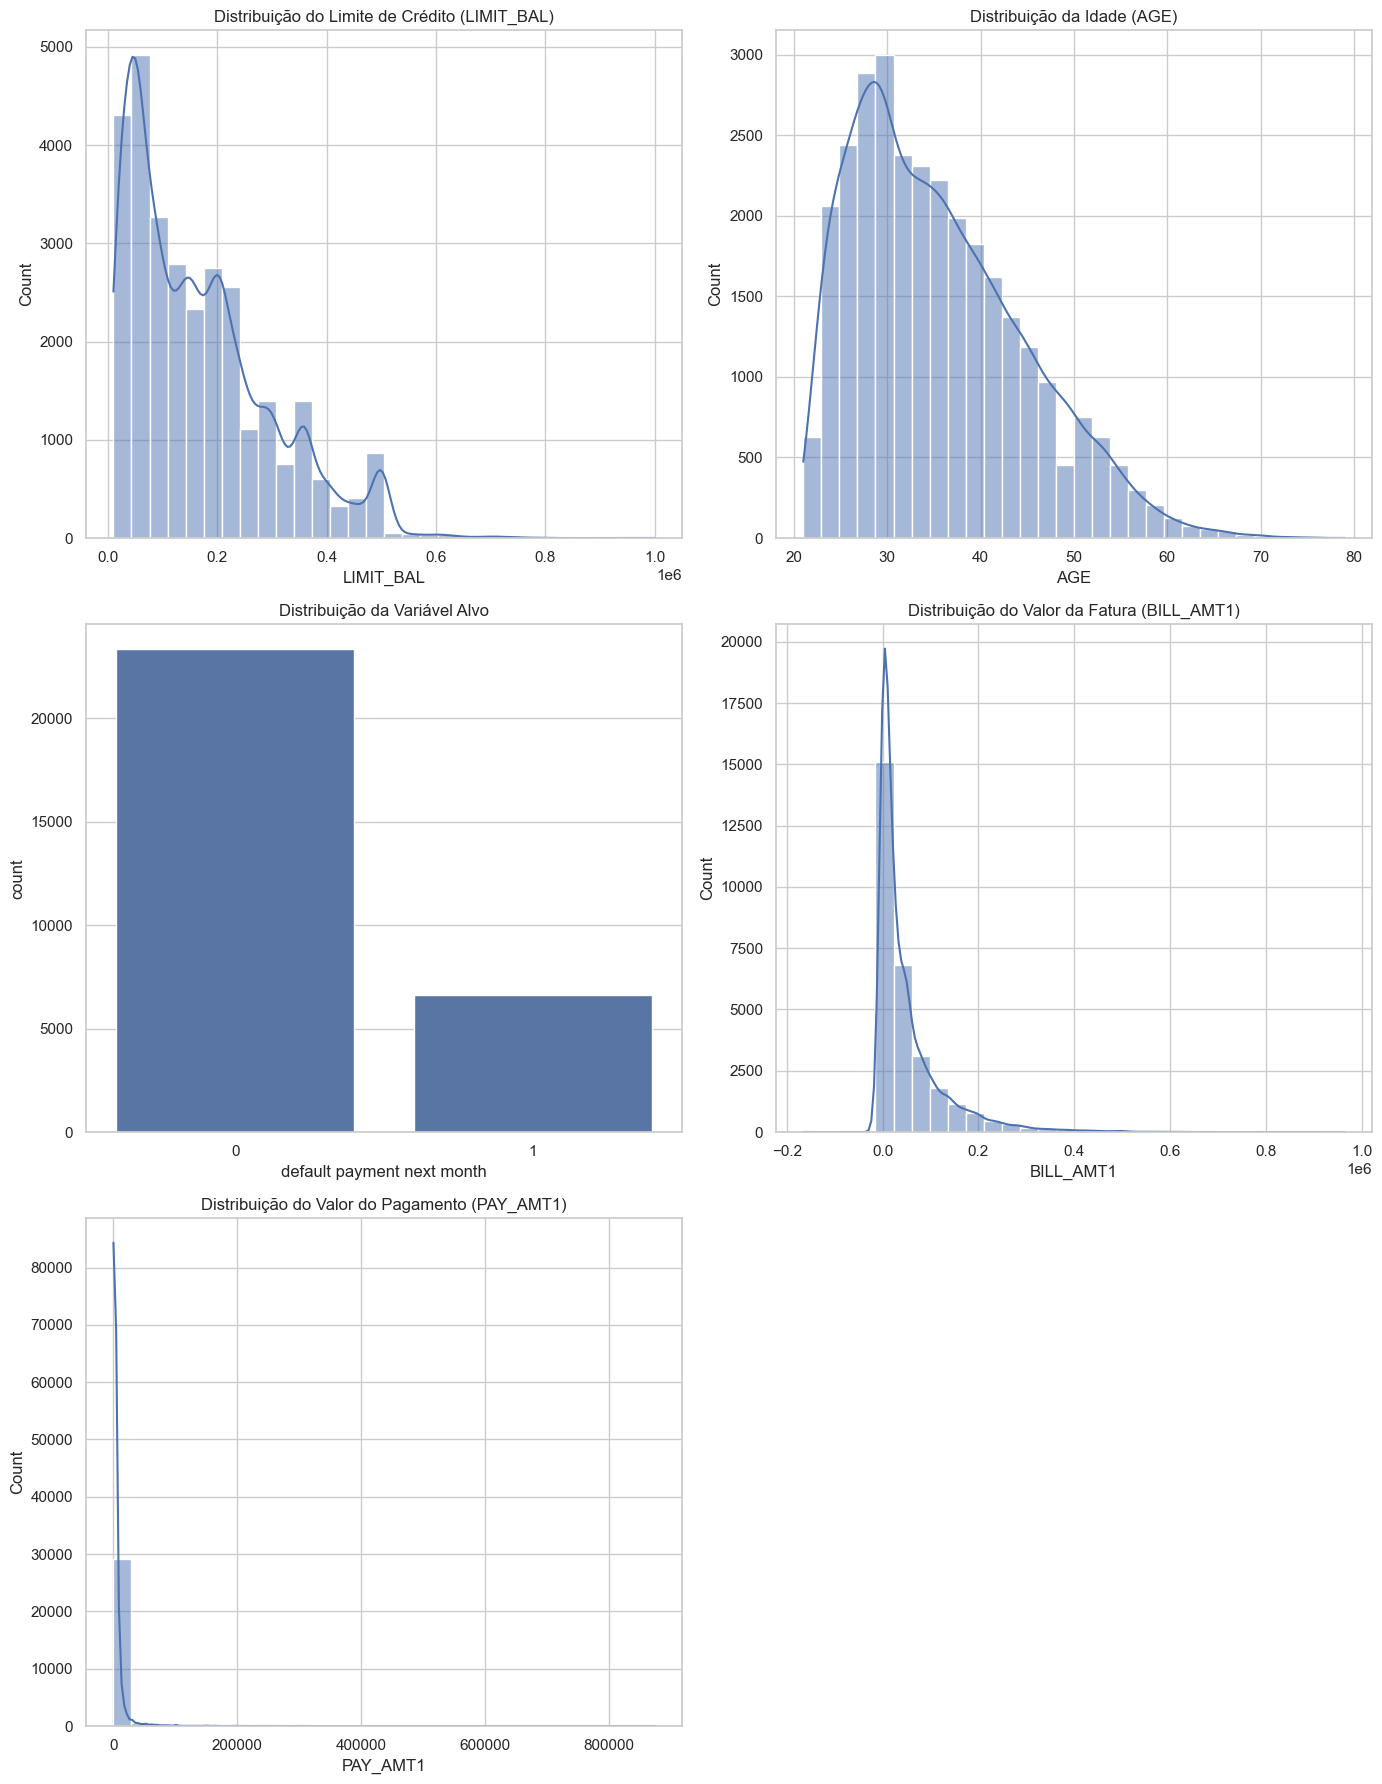

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar subplots para as variáveis numéricas principais
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# Distribuição do limite de crédito (LIMIT_BAL)
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição do Limite de Crédito (LIMIT_BAL)')

# Distribuição da idade (AGE)
sns.histplot(df['AGE'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição da Idade (AGE)')

# Distribuição da variável alvo (default payment next month)
sns.countplot(x='default payment next month', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição da Variável Alvo')

# Distribuição de BILL_AMT1
sns.histplot(df['BILL_AMT1'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição do Valor da Fatura (BILL_AMT1)')

# Distribuição de PAY_AMT1
sns.histplot(df['PAY_AMT1'], bins=30, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribuição do Valor do Pagamento (PAY_AMT1)')

# Ocultar gráfico vazio
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


Distribuição das Variáveis Categóricas

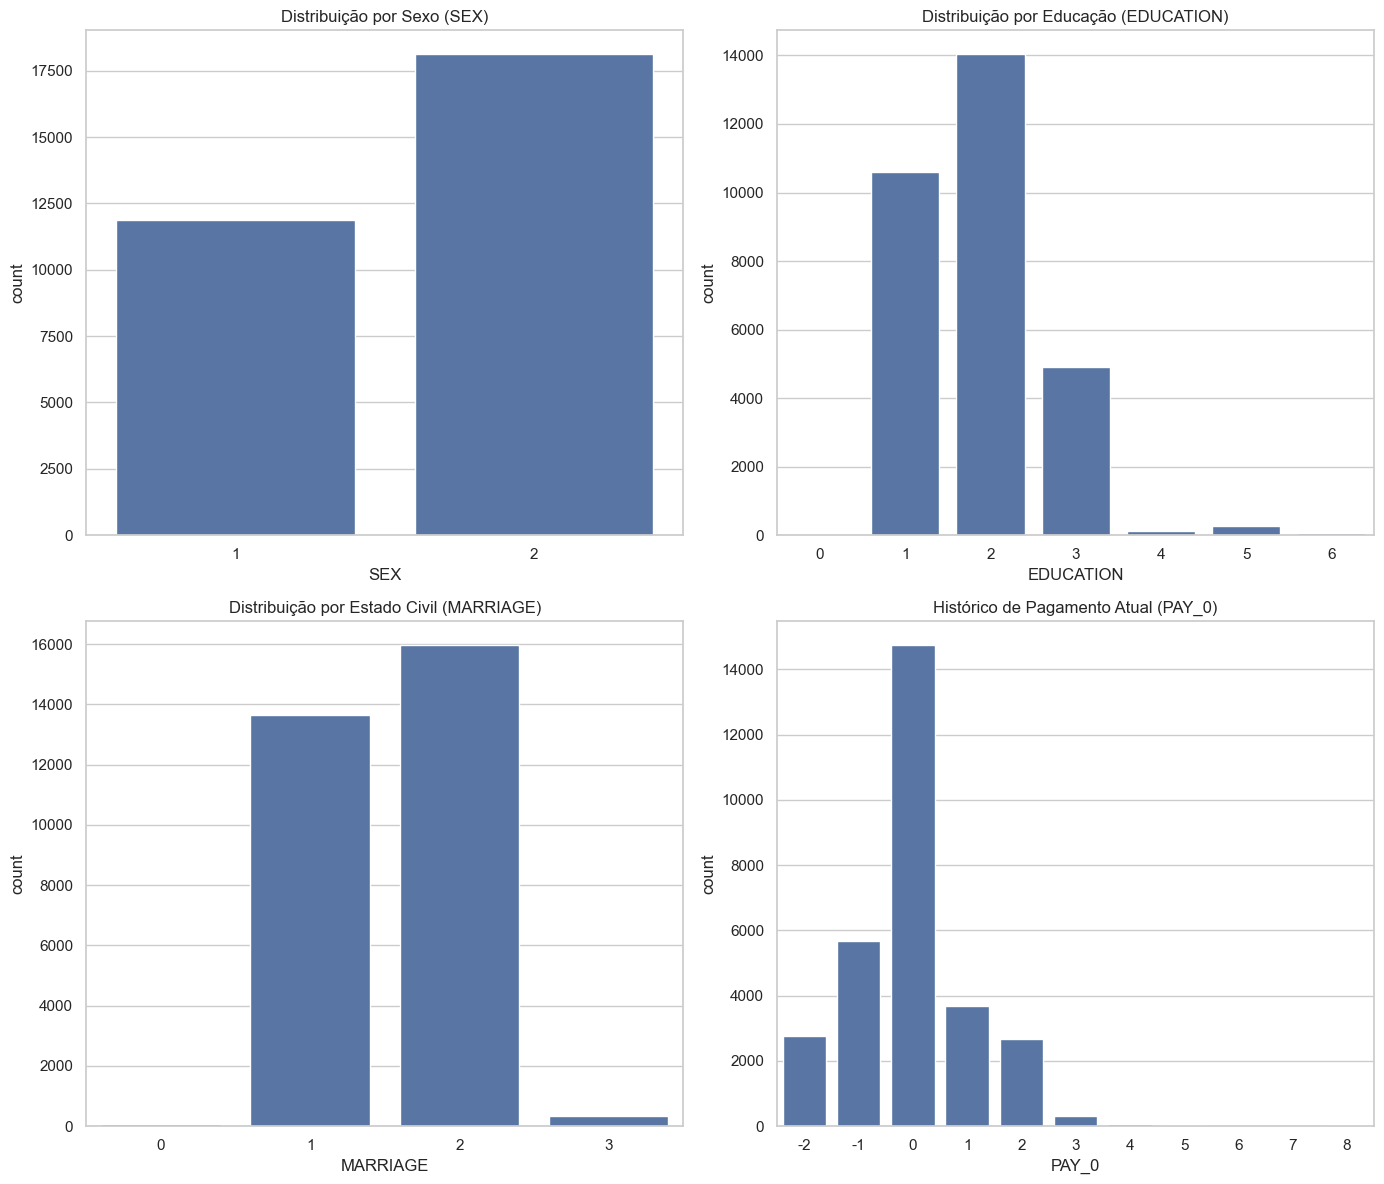

In [5]:
# Criar subplots para as variáveis categóricas principais
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Distribuição da variável SEX
sns.countplot(x='SEX', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição por Sexo (SEX)')

# Distribuição da variável EDUCATION
sns.countplot(x='EDUCATION', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição por Educação (EDUCATION)')

# Distribuição da variável MARRIAGE
sns.countplot(x='MARRIAGE', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição por Estado Civil (MARRIAGE)')

# Distribuição da variável PAY_0 (Histórico de Pagamento Atual)
sns.countplot(x='PAY_0', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Histórico de Pagamento Atual (PAY_0)')

plt.tight_layout()
plt.show()


# Preparação dos Dados

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tratar valores ausentes (nesse caso, vamos apenas verificar se há valores ausentes)
print(df.isnull().sum())  # Isso mostrará o número de valores ausentes por coluna

# 2. Codificar variáveis categóricas (se necessário)
# Nesse dataset, as variáveis categóricas já estão em formato numérico, então podemos pular essa etapa.

# 3. Separar as features (X) e a variável alvo (y)
X = df.drop(['default payment next month', 'ID'], axis=1)  # Remover a coluna ID e a variável alvo
y = df['default payment next month']

# 4. Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Normalizar/Padronizar as variáveis (opcional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exibir o shape dos dados para confirmar a divisão
print(f'Treinamento: {X_train.shape}, Teste: {X_test.shape}')


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
Treinamento: (21000, 23), Teste: (9000, 23)


#  Construção do Modelo de Machine Learning

Vamos começar com um modelo simples de Regressão Logística para prever a inadimplência do cliente.

*Código para Construção do Modelo:*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Instanciar o modelo
model = LogisticRegression(random_state=42)

# 2. Treinar o modelo
model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# 4. Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))


Matriz de Confusão:
 [[6825  215]
 [1506  454]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Acurácia: 0.8087777777777778


# Árvore de Decisão

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 1. Instanciar o modelo
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo
dt_model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred_dt = dt_model.predict(X_test)

# 4. Avaliar o modelo
print("Árvore de Decisão - Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_dt))
print("\nÁrvore de Decisão - Relatório de Classificação:\n", classification_report(y_test, y_pred_dt))
print("Árvore de Decisão - Acurácia:", accuracy_score(y_test, y_pred_dt))


Árvore de Decisão - Matriz de Confusão:
 [[5711 1329]
 [1137  823]]

Árvore de Decisão - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.38      0.42      0.40      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000

Árvore de Decisão - Acurácia: 0.726


# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar o modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# 2. Treinar o modelo
rf_model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# 4. Avaliar o modelo
print("Random Forest - Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Acurácia:", accuracy_score(y_test, y_pred_rf))


Random Forest - Matriz de Confusão:
 [[6614  426]
 [1251  709]]

Random Forest - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Random Forest - Acurácia: 0.8136666666666666


# salvando modelos

In [9]:
import joblib

# Salvar o modelo treinado
joblib.dump(model, 'modelo_credito_logistic_regression.pkl')

# Para carregar o modelo posteriormente
# model = joblib.load('modelo_credito_logistic_regression.pkl')


['modelo_credito_logistic_regression.pkl']

In [12]:
import joblib

# Salvar o modelo de Árvore de Decisão
joblib.dump(dt_model, 'modelo_arvore_decisao.pkl')

# Para carregar o modelo posteriormente
# dt_model = joblib.load('modelo_arvore_decisao.pkl')


['modelo_arvore_decisao.pkl']

In [13]:
import joblib

# Salvar o modelo de Random Forest
joblib.dump(rf_model, 'modelo_random_forest.pkl')

# Para carregar o modelo posteriormente
# rf_model = joblib.load('modelo_random_forest.pkl')


['modelo_random_forest.pkl']